In [1]:
##Obteniendo los datos

In [2]:
import numpy as np
import pandas as pd 
!pip install yfinance
!pip install yahoofinancials
import matplotlib.pyplot as plt
import yfinance as yf

stocks=["GOOGL","TSLA","MSFT","META","CRM","AMD","NVDA","INTC","PYPL","AMZN","SAP","DIS","ORCL","TSM","SBUX","FTNT","GPRO","ASML","CSCO","V","MA"]

fecha_inicio = "2017-01-01"  #FECHA DE INICIO

df=yf.download("AAPL", start=fecha_inicio)
df["Name"]="AAPL"

for stock in stocks:
  dfp=yf.download(stock, start=fecha_inicio)
  dfp["Name"]=stock
  df=pd.concat([df, dfp], axis=0,)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
##Obteniendo los returns

In [4]:
#OBTENIENDO LOS RETURNS

names=stocks=[1]
all_dates = df.index.unique().sort_values()
start = all_dates.get_loc('2017-12-08')
end = all_dates.get_loc('2022-01-03')

dates = all_dates[start:end+1]
close_prices = pd.DataFrame(index=dates)
tmp1 = df.loc[dates]
for name in names:
  df_sym = tmp1[tmp1['Name'] == name]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
  close_prices = close_prices.join(df_tmp) # left-join por default default
if close_prices.isna().sum().sum() > 0:
  print("Hay valores vacios")
  close_prices.fillna(method='ffill', inplace=True)
  print(close_prices.isna().sum().sum())

returns = pd.DataFrame(index=dates[1:])
for name in names:
  current_returns = np.log(close_prices[name] / close_prices[name].shift(1))
  returns[name] = current_returns.iloc[1:] * 100

In [5]:
returns

,AAPL,GOOGL,TSLA,MSFT,META,CRM,AMD,NVDA,INTC,PYPL,...,DIS,ORCL,TSM,SBUX,FTNT,GPRO,ASML,CSCO,V,MA
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-11,1.929661,0.246504,4.279891,1.263373,0.022340,1.057802,2.189145,1.641885,0.712568,0.519833,...,2.463878,1.738832,0.944243,0.781784,0.641560,2.219565,1.815042,0.926296,-0.204468,0.658316
2017-12-12,-0.563350,-0.304654,3.618623,0.409811,-1.168545,-0.835702,-2.592371,-1.981910,-0.758707,0.449258,...,0.560067,-0.158639,-0.177958,0.338011,-0.094791,-2.094964,-1.710428,-0.131802,0.965332,1.067974
2017-12-13,0.331429,0.249506,-0.588185,-0.269120,0.754379,0.260107,2.099028,-2.472145,0.023072,0.636376,...,0.167411,-0.677024,-0.025444,0.370498,1.108108,-0.499376,0.694606,0.631087,-0.132294,-0.532562
2017-12-14,-0.029030,0.576618,-0.336821,-0.776287,0.050462,0.288208,0.197633,0.155647,-0.184762,0.229196,...,2.713522,0.279329,0.279580,0.352377,0.140582,-1.895188,-0.839926,-0.657465,-0.344782,0.158086
2017-12-15,1.011014,1.364676,1.632122,2.518492,0.998415,1.182548,1.567122,2.693069,2.960824,1.854498,...,0.631085,-3.838423,0.253482,-2.390147,2.154106,2.519022,1.093413,0.762251,0.793866,0.962901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,-0.578395,-0.827924,-0.501282,-0.351035,0.011556,-1.109497,-0.786975,-2.033795,-0.347156,-0.999714,...,1.558469,-0.998941,-0.522962,1.174998,-0.455246,-0.093679,-0.824157,0.173298,0.192801,0.130359
2021-12-29,0.050192,-0.021816,-0.209691,0.204922,-0.951890,-0.356872,-3.245034,-1.064278,0.135155,-0.068411,...,-0.212856,-0.497572,-0.533943,0.698427,0.201985,-0.563915,-0.347290,0.674566,0.055016,0.141263
2021-12-30,-0.659999,-0.310391,-1.469978,-0.772093,0.413207,0.309887,-2.119980,-1.392952,-0.173796,1.000403,...,0.682112,-0.226986,-0.818766,-0.120367,-1.916039,-1.232829,-0.219699,-0.533000,-0.137603,-0.083075


In [6]:
returns.isna().sum().sum()

0

## Obtener retornos

In [7]:
def get_retornos(s,e):
  start = all_dates.get_loc(s)
  end = all_dates.get_loc(e)
  dates = all_dates[start:end+1]

  close_prices=pd.DataFrame(index=dates)
  tam=len(close_prices)

  for i in range(len(close_prices)-1):
    if i != 0:
      close_prices = close_prices.drop(close_prices.index[1])

  tmp1 = df.loc[dates]
  for name in names:
    df_sym = tmp1[tmp1['Name'] == name]
    df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
    close_prices = close_prices.join(df_tmp) # left-join by default

  retornos=pd.DataFrame(index=dates)
  for i in range((tam-1)):
    if i != 0:
      retornos = retornos.drop(retornos.index[1])

  for name in names:
    current_returns = close_prices[name].pct_change()
    retornos[name] = current_returns.iloc[1:]

  retornos = retornos.drop(retornos.index[0])
  retornos = retornos.to_numpy()
  return retornos[0]
  

## MPT

In [8]:
def get_w_MPT(mean_return,cov_np):
    #Assets solos
  D = len(mean_return)
  single_asset_returns = np.zeros(D)
  single_asset_risks = np.zeros(D)
  for i in range(D):
    ret = mean_return[i]
    risk = np.sqrt(cov_np[i,i])

    single_asset_returns[i] = ret
    single_asset_risks[i] = risk

  #plt.figure(figsize=(8,6))
  #plt.scatter(single_asset_risks, single_asset_returns, c='red');
  #plt.xlabel("Riesgo")
  #plt.ylabel("Ganancia")
  #plt.title("Mean vs Desviación estandar",fontsize=15)
  #for i, label in enumerate(stocks):
  #  plt.annotate(label, (single_asset_risks[i], single_asset_returns[i]))
  #plt.show()


  #MIN AND MAX
  from scipy.optimize import linprog
  A_eq = np.ones((1, D))
  b_eq = np.ones(1)
  bounds = [(0, 1)]*D
  # minimize
  res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
  min_return = res.fun
  # maximize
  res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
  max_return = -res.fun
  #print(min_return, max_return)


  #ENCONTRAR LA FRONTERA EFICIENTE
  N = 100
  target_returns = np.linspace(min_return, max_return, num=N)
  from scipy.optimize import minimize
  def get_portfolio_variance(weights):
    return weights.dot(cov).dot(weights)
  def target_return_constraint(weights, target):
    return weights.dot(mean_return) - target
  def portfolio_constraint(weights):
    return weights.sum() - 1


  constraints = [
      {
          'type': 'eq',
          'fun': target_return_constraint,
          'args': [target_returns[0]], # se va a estar actalizando en el ciclo
      },
      {
          'type': 'eq',
          'fun': portfolio_constraint,
      }
  ]

  optimized_risks = []
  for target in target_returns:
    # set target return constraint
    constraints[0]['args'] = [target]

    res = minimize(
        fun=get_portfolio_variance,
        x0=np.ones(D) / D, # uniform
        method='SLSQP',
        constraints=constraints,
        bounds=bounds,
    )
    optimized_risks.append(np.sqrt(res.fun))
    if res.status != 0:
      print(res)

  #plt.plot(optimized_risks, target_returns, c='black');
  #plt.xlabel('Riesgo')
  #plt.ylabel('Retorno esperado')


  # MIN VARIANZA
  res = minimize(
      fun=get_portfolio_variance,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints={
          'type': 'eq',
          'fun': portfolio_constraint,
      },
      bounds=bounds,
  )

  mv_risk = np.sqrt(res.fun)
  mv_weights = res.x
  mv_ret = mv_weights.dot(mean_return)


  #plt.plot(optimized_risks, target_returns, c='black');
  #plt.scatter([mv_risk], [mv_ret], c='red');
  #plt.xlabel('Riesgo')
  #plt.ylabel('Retorno esperado')

  w_minimo_riesgo=mv_weights



  #GET SHAPE RATIO

  # https://fred.stlouisfed.org/series/TB3MS
  #risk_free_rate = 0.04 / 22
  #risk_free_rate=0.04 / 252
  risk_free_rate=0.15 / 16
  # mean_return, cov, bounds
  def neg_sharpe_ratio(weights):
    mean = weights.dot(mean_return)
    sd = np.sqrt(weights.dot(cov).dot(weights))
    return -(mean - risk_free_rate) / sd

  res = minimize(
      fun=neg_sharpe_ratio,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints={
          'type': 'eq',
          'fun': portfolio_constraint,
      },
      bounds=bounds,
  )

  best_sr, best_w = -res.fun, res.x

  w_shape_ratio=best_w
  return [w_minimo_riesgo,w_shape_ratio] 

## Algoritmo RL

In [9]:
#Distribución normal truncada
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def get_elite(elite, elite_tam):
  c_elite=sorted(elite,reverse=True)
  bests=[]
  for i in range(int(elite_tam)):
    for j in range(len(elite)):
      if c_elite[i]==elite[j]:
         bests.append(j)
  return bests



#Algoritmo
def CEM(retornos): #recibe un array
  #Inicializando variables
  rendimiento= retornos #FALTA
  D=len(retornos)
  mu=np.zeros(D) 
  delta=np.ones(D)
  batch_size=50
  elite_frac=0.1 
  n_iteraciones=50

  for t in range(n_iteraciones):
    #Obtener candidatos para w
    w_total=[]
    for k in range(batch_size):
      w=np.ones(D)
      for i in range(D):
        X = get_truncated_normal(mean=mu[i], sd=delta[i], low=0, upp=1)
        w[i]=X.rvs()
      w /= np.sum(w)
      w_total.append(w)
    
    #Evaluación de candidatos w
    rend=np.ones(batch_size)
    for i in range(batch_size):
      rend[i]=rendimiento.dot(w_total[i]) #Obtener rendimiento

    #Se obtienen los indices donde están los elite_frac mejores  
    elite_tam=elite_frac*batch_size
    indices_elite=get_elite(rend, elite_tam)

    #agregamos en elite_set las elite_frac w mejores
    elite_set=[]
    for x in indices_elite:
      elite_set.append(w_total[x]) 

    #Obtenemos la nueva mu y delta
    mu=np.zeros(D)
    delta=np.ones(D)
    for i in range(D):
      data=[]
      for j in range(int(elite_tam)):
        data.append(elite_set[j][i])
      mu[i]=np.mean(data)
      delta[i]=np.std(data)

  return mu  

## Ciclo

In [10]:
#EMPEZAR A HACER EL CICLO
x1=0
x2=14 #14 días entrenamiento y 1 día ganancia
x_inicial1=x1
x_inicial2=x2
ganancia_varianza_min=[]
ganancia_shape_ratio=[]
ganancia_CEM=[]
fechas=[]
#w_SR_list=[]
#w_CEM_list=[]
#w_VM_list=[]


Error_SR=0
Error_VM=0
Error_CEM=0
re=0
while x2<=(len(returns)-1):
  re=re+1
  print(re)
  mean_return = returns[x1:x2].mean()
  cov = returns[x1:x2].cov()
  cov_np = cov.to_numpy()
  

  #ALGORITMO
  #Encontrar w con MPT
  w = get_w_MPT(mean_return, cov_np)
  w_varianza_min=w[0]
  w_sharpe_ratio=w[1]

  #Encontrar w con RL
  w_CEM = CEM(get_retornos(returns[x1:x2].index[x_inicial1], returns[x1:x2].index[x_inicial2-1]))


  #Obtener la ganancia
  retornos=get_retornos(returns[x1:(x2+1)].index[x_inicial2-1], returns[x1:(x2+1)].index[x_inicial2])
  ganancia_varianza_min.append(w_varianza_min.dot(retornos)) 
  ganancia_shape_ratio.append(w_sharpe_ratio.dot(retornos)) 
  ganancia_CEM.append(w_CEM.dot(retornos))
  #w_CEM_list.append(w_CEM)
  #w_SR_list.append(w_sharpe_ratio)
  #w_VM_list.append(w_varianza_min)

  Error_SR=Error_SR + w_sharpe_ratio.dot(retornos)
  Error_VM=Error_VM + w_varianza_min.dot(retornos)
  Error_CEM=Error_CEM + w_CEM.dot(retornos)
  
  #Actualizar días
  x1=x1+1
  x2=x2+1

  fechas.append(returns[x1:x2].index[x_inicial2-1])


1
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
2
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
3
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
4
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
5
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
6
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
7
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
8
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
9
     fun: 4.134681694644673
     jac: array([ 0.6193378 ,  2.41009426,  2.91378397,  0.52197814,  2.8981989 ,
        1.77788979,  9.28840077,  8.26936334, -1.76380128,  3.73538452,


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
64
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
65
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
66
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
67
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
68
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
69
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
70
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
71
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
72
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
73
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
125
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
126
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
127
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
128
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
129
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
130
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
131
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
132
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
133
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
134
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
204
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
205
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
206
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
207
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
208
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
209
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
210
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
211
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
212
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
257
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
258
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
259
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
260
     fun: 8.643770007408225
     jac: array([15.64397931, 11.07379663,  9.3799361 , 13.52316058, 16.62947822,
       14.44208407, 19.88432038, 14.26559532, 12.21753979, 15.55266702,
       14.82461095, 10.02179837,  9.3735956 , 11.35417545,  7.11460805,
        7.20063138, 10.72192943, 17.28753984, 13.85554588, 10.79481411,
       13.28550923, 13.28231001])
 message: 'Positive directional derivative for linesearch'
    nfev: 69
     nit: 7
    njev: 3
  status: 8
 success: False
       x: array([1.36762992e-11, 0.00000000e+00, 0.00000000e+00, 5.37629130e-12,
       6.03002028e-12, 0.

f
f
f
f
f
f
f
f
f
f
f
318
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
319
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
320
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
321
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
322
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
323
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
324
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
325
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
326
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
327
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
380
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
381
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
382
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
383
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
384
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
385
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
386
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
387
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
388
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
389
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
442
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
443
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
444
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
445
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
446
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
447
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
448
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
449
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
450
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
503
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
504
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
505
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
506
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
507
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
508
     fun: 4.219471590204509
     jac: array([-0.08077103,  1.61919641,  8.43894309,  0.50083077,  2.77407187,
        2.3739872 ,  2.19693869,  2.0426017 ,  0.16160446,  1.40246564,
        1.04560459,  1.4098146 ,  0.53829873,  2.49765706,  0.43777466,
        0.85263926,  3.14108729, -1.17511165,  0.46050334,  0.75282991,
        0.58406353,  0.6070174 ])
 message: 'Positive directional derivative for linesearch'
    nfev: 93
     nit: 8
    njev: 4
  stat

/tmp/ipykernel_11467/2425136406.py:32: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
/tmp/ipykernel_11467/2425136406.py:32: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
/home/oscarfd/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.0487e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
545
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
546
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
547
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
548
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
549
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
550
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
551
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
552
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
553
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


/home/oscarfd/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.2392e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
562
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
563
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
564
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
565
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
566
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
567
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
568
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
569
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
570
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
640
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
641
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
642
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
643
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
644
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
645
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
646
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
647
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
648
     fun: 28.718829177056346
     jac: array([  6.27020454,   5.45850205,  -4.15310335,  10.5553925 ,
         3.80542397,   9.80900502,  57.43842

f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
702
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
703
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
704
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
705
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
706
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
707
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
708
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
709
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
710
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
738
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
739
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
740
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
741
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
742
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
743
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
744
     fun: 8.50945241963307
     jac: array([ 4.94878733,  5.41986799, 11.07350612,  2.12512565,  5.17670012,
       -0.58901536, -0.84503245,  2.47152936,  0.84007597, -0.51803195,
        2.98389888,  0.68313837, -3.91271174,  0.25378489,  5.03014636,
        3.07810402,  6.45617557, 17.01890481,  7.02345455, -0.6148808 ,
     

/tmp/ipykernel_11467/2425136406.py:29: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
/tmp/ipykernel_11467/2425136406.py:29: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
/home/oscarfd/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.47042e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
791
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
792
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
793
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
794
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
795
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
796
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
797
     fun: 19.79647893281435
     jac: array([13.94920254,  9.30168605, 39.59295774,  9.89734221,  6.68449688,
       10.2908895 , 17.78647161, 16.85647511, 19.53963208, 18.83933187,
        7.82535362,  6.27903724,  1.76694202, -3.84244466, 15.01348829,
        4.32800031

f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
843
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
844
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
845
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
846
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
847
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
848
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
849
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
850
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
851
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
852
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
905
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
906
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
907
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
908
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
909
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
910
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
911
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
912
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
913
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f


f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
977
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
978
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
979
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
980
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
981
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
982
     fun: 14.169829708209866
     jac: array([-0.40027463,  3.78952944, -9.52615654,  1.88094652,  6.67116129,
        4.65925264,  7.8307116 , -1.99016237,  2.14973605, 10.59644914,
        2.9647876 ,  2.8162874 , -3.65301156,  0.42273057, -1.58743191,
        3.91784525,  6.42531693, 28.33988726,  8.27024889, -0.12608385,
        6.18494523,  8.44454241])
 message: 'Iterat

## Hape ratio resultados:

In [11]:
#Retorno acumulado Sharpe ratio
inversion=100
for x in ganancia_shape_ratio:
  inversion=inversion+(inversion*x)

inversion_final=inversion

print(inversion)
print(str(inversion-100)+"%")

379.5671143443251
279.5671143443251%


In [12]:
#ANUAL promedio
t=0
inversion1=100
inversion2=100
inversion3=100
inversion4=100
for x in ganancia_shape_ratio:
  t=t+1
  if(t<=253):
    inversion1=inversion1+(inversion1*x)
  elif t>253 and t<=505:
    inversion2=inversion2+(inversion2*x)
  elif t>505 and t<=757:
    inversion3=inversion3+(inversion3*x)
  else:
    inversion4=inversion4+(inversion4*x)
  anual=(inversion1+inversion2+inversion3+inversion4)/4
  anual=anual-100
print(anual)

44.52645195458632


In [13]:
#tasa de crecimiento anual compuesto
CAGR=(pow((inversion_final/100),1/4)-1)*100
print(CAGR)

39.57966271231956


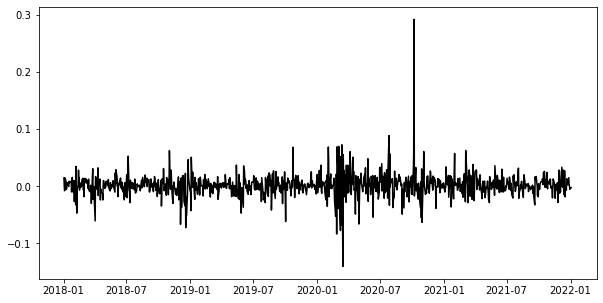

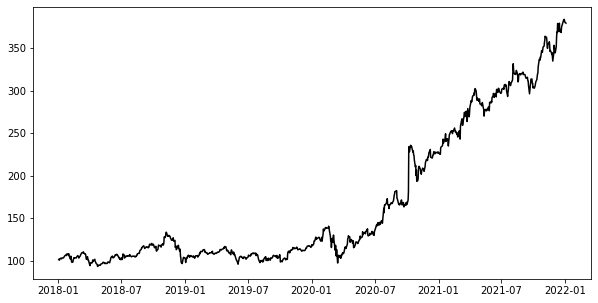

In [17]:
#Gráfica
fig, ax = plt.subplots(figsize=(10, 5))
#plt.scatter(fechas, ganancia_shape_ratio, c='red');
plt.plot(fechas, ganancia_shape_ratio, c='black');

inversion=100
t_SR=[]
for x in ganancia_shape_ratio:
  inversion=inversion+(inversion*x)
  t_SR.append(inversion)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(fechas, t_SR, c='black');
#plt.scatter(fechas, t_SR, c='red');

    ## CEM

In [18]:
#Retorno acumulado CEM
inversion=100
for x in ganancia_CEM:
  inversion=inversion+(inversion*x)

inversion_final=inversion

print(inversion)
print(str(inversion-100)+"%")

339.79270182712287
239.79270182712287%


In [20]:
#Tasa de Crecimiento Anual Promedio CEM
#ANUAL promedio
t=0
inversion1=100
inversion2=100
inversion3=100
inversion4=100
for x in ganancia_CEM:
  t=t+1
  if(t<=253):
    inversion1=inversion1+(inversion1*x)
  elif t>253 and t<=505:
    inversion2=inversion2+(inversion2*x)
  elif t>505 and t<=757:
    inversion3=inversion3+(inversion3*x)
  else:
    inversion4=inversion4+(inversion4*x)
  anual=(inversion1+inversion2+inversion3+inversion4)/4
  anual=anual-100
print(anual)

38.15645336197093


In [21]:
#tasa de crecimiento anual compuesto CEM
CAGR=(pow((inversion_final/100),1/4)-1)*100
print(CAGR)

35.769904237186914


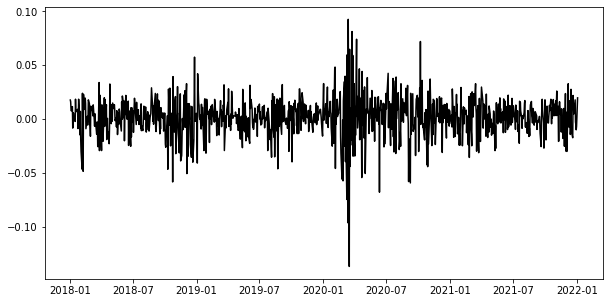

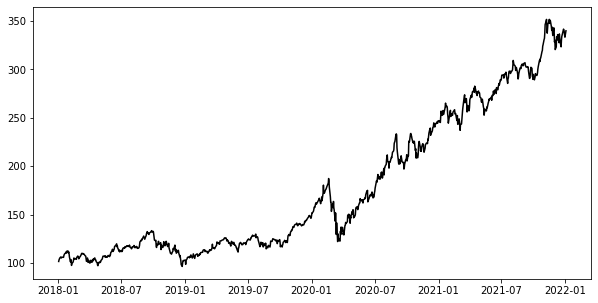

In [22]:
#Gráfica
fig, ax = plt.subplots(figsize=(10, 5))
#plt.scatter(fechas, ganancia_CEM, c='red');
plt.plot(fechas, ganancia_CEM, c='black');

inversion=100
t=[]
for x in ganancia_CEM:
  inversion=inversion+(inversion*x)
  t.append(inversion)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(fechas, t, c='black');
#plt.scatter(fechas, t, c='red');

## Varianza mínima

In [23]:
#Retorno acumulado Varianza mínima
inversion=100
for x in ganancia_varianza_min:
  inversion=inversion+(inversion*x)

inversion_final=inversion

print(inversion)
print(str(inversion-100)+"%")

276.37962580924466
176.37962580924466%


In [24]:
#ANUAL promedio
t=0
inversion1=100
inversion2=100
inversion3=100
inversion4=100
for x in ganancia_varianza_min:
  t=t+1
  if(t<=253):
    inversion1=inversion1+(inversion1*x)
  elif t>253 and t<=505:
    inversion2=inversion2+(inversion2*x)
  elif t>505 and t<=757:
    inversion3=inversion3+(inversion3*x)
  else:
    inversion4=inversion4+(inversion4*x)
  anual=(inversion1+inversion2+inversion3+inversion4)/4
  anual=anual-100
print(anual)

29.27246268174821


In [25]:
#tasa de crecimiento anual compuesto varianza mínima
CAGR=(pow((inversion_final/100),1/4)-1)*100
print(CAGR)

28.936686765169007


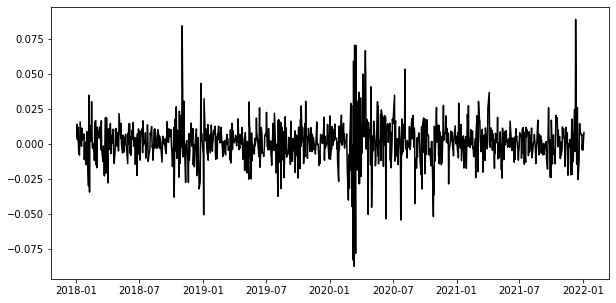

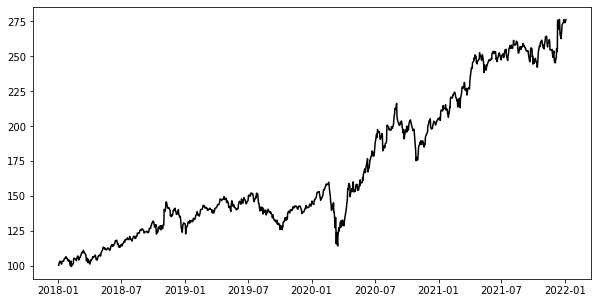

In [26]:
#Gráfica
fig, ax = plt.subplots(figsize=(10, 5))
#plt.scatter(fechas_x2, ganancia_varianza_min, c='red');
plt.plot(fechas, ganancia_varianza_min, c='black');

inversion=100
t=[]
for x in ganancia_varianza_min:
  inversion=inversion+(inversion*x)
  t.append(inversion)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(fechas, t, c='black');
#plt.scatter(fechas_x2, t, c='red');

In [27]:
Error_SR

1.5436957922733598

In [29]:
Error_CEM

1.3941486809103143

In [30]:
Error_VM

1.1258072611209866